# Solution By: Vipin Choudhary
 Last updated December 4, 2020

### Project - The Grand Hackathon 2.0 !!!

### Problem Statement:

The objective is to build a regressor model which can predict the heart rate of an individual. This prediction can help to monitor stress levels of the individual

### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


##### Reading the input file

In [2]:
df_train_freq_domn_ft = pd.read_csv('C:/Users/choud/Downloads/UTA/Hackathon/Train Data/frequency_domain_features_train.csv')
df_train_freq_domn_ft.head()


,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [3]:
df_train_freq_domn_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   uuid     369289 non-null  object 
 1   VLF      369289 non-null  float64
 2   VLF_PCT  369289 non-null  float64
 3   LF       369289 non-null  float64
 4   LF_PCT   369289 non-null  float64
 5   LF_NU    369289 non-null  float64
 6   HF       369289 non-null  float64
 7   HF_PCT   369289 non-null  float64
 8   HF_NU    369289 non-null  float64
 9   TP       369289 non-null  float64
 10  LF_HF    369289 non-null  float64
 11  HF_LF    369289 non-null  float64
dtypes: float64(11), object(1)
memory usage: 33.8+ MB


In [4]:
df_train_freq_domn_ft.shape

(369289, 12)

In [5]:
# Checking Unique Keys
df_train_freq_domn_ft.nunique()

uuid       369289
VLF        369289
VLF_PCT    369289
LF         369289
LF_PCT     369289
LF_NU      369289
HF         369289
HF_PCT     369289
HF_NU      369289
TP         369289
LF_HF      369289
HF_LF      369289
dtype: int64

In [6]:
df_train_freq_domn_ft.isnull().sum()

uuid       0
VLF        0
VLF_PCT    0
LF         0
LF_PCT     0
LF_NU      0
HF         0
HF_PCT     0
HF_NU      0
TP         0
LF_HF      0
HF_LF      0
dtype: int64

In [7]:
df_train_freq_domn_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1667.903111,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,66.350237,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,782.716291,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,32.047025,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,96.643140,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,24.841938,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2796.856587,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,28.789747,80.429614,7796.443096


In [8]:
df_train_freq_domn_ft[df_train_freq_domn_ft.isnull().any(axis=1)]

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF


In [9]:
df_train_hrt_rt_ft = pd.read_csv('C:/Users/choud/Downloads/UTA/Hackathon/Train Data/heart_rate_non_linear_features_train.csv')
df_train_hrt_rt_ft.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [10]:
df_train_hrt_rt_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   uuid       369289 non-null  object 
 1   SD1        369289 non-null  float64
 2   SD2        369289 non-null  float64
 3   sampen     369289 non-null  float64
 4   higuci     369289 non-null  float64
 5   datasetId  369289 non-null  int64  
 6   condition  369289 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 19.7+ MB


In [11]:
df_train_hrt_rt_ft.shape

(369289, 7)

In [12]:
df_train_hrt_rt_ft.nunique()

uuid         369289
SD1          369289
SD2          369289
sampen        82511
higuci       369289
datasetId         1
condition         3
dtype: int64

In [13]:
df_train_hrt_rt_ft.isnull().sum()

uuid         0
SD1          0
SD2          0
sampen       0
higuci       0
datasetId    0
condition    0
dtype: int64

In [14]:
df_train_hrt_rt_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
SD1,369289.0,10.593708,2.914795,3.911344,8.368340,10.196621,12.679005,18.836107
SD2,369289.0,154.178997,109.170222,38.307745,90.326864,116.221063,166.764850,796.852945
sampen,369289.0,2.062471,0.206999,0.434576,2.032977,2.134214,2.181929,2.234841
higuci,369289.0,1.182292,0.062192,1.033984,1.139929,1.174293,1.223621,1.361219
datasetId,369289.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [15]:
df_train_hrt_rt_ft[df_train_hrt_rt_ft.isnull().any(axis=1)]

,uuid,SD1,SD2,sampen,higuci,datasetId,condition


In [16]:
df_train_time_do_ft = pd.read_csv('C:/Users/choud/Downloads/UTA/Hackathon/Train Data/time_domain_features_train.csv')
df_train_time_do_ft.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [17]:
df_train_time_do_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   KURT               369289 non-null  float64
 10  SKEW               369289 non-null  float64
 11  MEAN_REL_RR        369289 non-null  float64
 12  MEDIAN_REL_RR      369289 non-null  float64
 13  SDRR_REL_RR        369289 non-null  float64
 14  RMSSD_REL_RR       369289 non-null  float64
 15  SDSD_REL_RR        369289 non-null  float64
 16  SD

In [18]:
df_train_time_do_ft.shape

(369289, 20)

In [19]:
df_train_time_do_ft.nunique()

MEAN_RR              369289
MEDIAN_RR            106329
SDRR                 369289
RMSSD                369289
SDSD                 369289
SDRR_RMSSD           369289
HR                   369289
pNN25                   592
pNN50                    83
KURT                 369289
SKEW                 369289
MEAN_REL_RR          369289
MEDIAN_REL_RR         25041
SDRR_REL_RR          369289
RMSSD_REL_RR         369289
SDSD_REL_RR          369289
SDRR_RMSSD_REL_RR    369289
KURT_REL_RR          369289
SKEW_REL_RR          369289
uuid                 369289
dtype: int64

In [20]:
df_train_freq_domn_ft.isnull().sum()

uuid       0
VLF        0
VLF_PCT    0
LF         0
LF_PCT     0
LF_NU      0
HF         0
HF_PCT     0
HF_NU      0
TP         0
LF_HF      0
HF_LF      0
dtype: int64

In [21]:
df_train_time_do_ft.describe().T

,count,mean,std,min,25%,50%,75%,max
MEAN_RR,369289.0,846.650104,124.603984,547.492221,760.228533,8.229514e+02,924.117422,1322.016957
MEDIAN_RR,369289.0,841.965890,132.321005,517.293295,755.750735,8.196896e+02,916.821570,1653.122250
SDRR,369289.0,109.352531,77.117025,27.233947,64.205641,8.260824e+01,118.237002,563.486949
RMSSD,369289.0,14.977498,4.120766,5.529742,11.830959,1.441592e+01,17.927144,26.629477
SDSD,369289.0,14.976767,4.120768,5.529630,11.830671,1.441539e+01,17.924839,26.629392
SDRR_RMSSD,369289.0,7.396597,5.143834,2.660381,4.541896,5.952112e+00,7.919841,54.523950
HR,369289.0,73.941824,10.337453,48.737243,66.715776,7.421781e+01,80.334937,113.752309
pNN25,369289.0,9.841143,8.195574,0.000000,3.666667,7.600000e+00,13.333333,39.400000
pNN50,369289.0,0.866001,0.990189,0.000000,0.000000,4.666667e-01,1.466667,5.466667
KURT,369289.0,0.523235,1.790348,-1.894820,-0.352783,4.073622e-02,0.722833,64.088107


In [22]:
df_train_time_do_ft[df_train_time_do_ft.isnull().any(axis=1)]

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid


#### Exploratory Data Analysis - Merging all three dataframes

In [23]:
df1 = pd.merge(df_train_freq_domn_ft, df_train_hrt_rt_ft)
#,df_train_time_do_ft
df1.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,2,no stress


In [24]:
df=pd.merge(df1,df_train_time_do_ft)
df.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  da

##### There are no duplicates in  the data

In [432]:
# Checking Unique Keys
df.nunique()

uuid                 369289
VLF                  369289
VLF_PCT              369289
LF                   369289
LF_PCT               369289
LF_NU                369289
HF                   369289
HF_PCT               369289
HF_NU                369289
TP                   369289
LF_HF                369289
HF_LF                369289
SD1                  369289
SD2                  369289
sampen                82511
higuci               369289
datasetId                 1
condition                 3
MEAN_RR              369289
MEDIAN_RR            106329
SDRR                 369289
RMSSD                369289
SDSD                 369289
SDRR_RMSSD           369289
HR                   369289
pNN25                   592
pNN50                    83
KURT                 369289
SKEW                 369289
MEAN_REL_RR          369289
MEDIAN_REL_RR         25041
SDRR_REL_RR          369289
RMSSD_REL_RR         369289
SDSD_REL_RR          369289
SDRR_RMSSD_REL_RR    369289
KURT_REL_RR         

In [26]:
df[df.isnull().any(axis=1)]

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR


In [27]:
# Checking Missing Values
df.isnull().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [30]:
df.to_csv(r'C:/Users/choud/Downloads/UTA/Hackathon/Train Data/DF.txt.gz',compression="gzip", index = False)

##### Though there are no missing values in the dataframe but there are unknowns

In [31]:
# Checking basic statistics like central value, std, quartiles about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


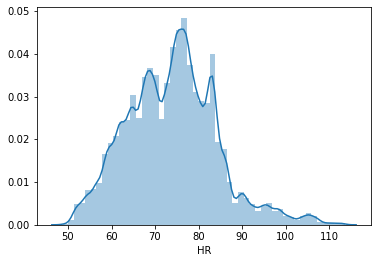

In [32]:
sns.distplot(df['HR'])


##### The target variable has the distribution of data to be almost normal, but with higher values on lesser range, / lesser values on higher range


In [37]:
print('Skewness of VLF_PCT=  ' ,df['VLF_PCT'].skew())
print('Skewness of LF=  ' ,df['LF'].skew())
print('Skewness of LF_PCT=  ' ,df['LF_PCT'].skew())
print('Skewness of LF_NU=  ' ,df['LF_NU'].skew())
print('Skewness of HF=  ' ,df['HF'].skew())
print('Skewness of HF_PCT=  ' ,df['HF_PCT'].skew())
print('Skewness of HF_NU=  ' ,df['HF_NU'].skew())
print('Skewness of TP=  ' ,df['TP'].skew())
print('Skewness of LF_HF=  ' ,df['LF_HF'].skew())
print('Skewness of HF_LF=  ' ,df['HF_LF'].skew())
print('Skewness of SD1=  ' ,df['SD1'].skew())
print('Skewness of SD2=  ' ,df['SD2'].skew())
print('Skewness of sampen=  ' ,df['sampen'].skew())
print('Skewness of higuci=  ' ,df['higuci'].skew())
print('Skewness of MEAN_RR=  ' ,df['MEAN_RR'].skew())
print('Skewness of MEDIAN_RR=  ' ,df['MEDIAN_RR'].skew())
print('Skewness of SDRR=  ' ,df['SDRR'].skew())
print('Skewness of RMSSD=  ' ,df['RMSSD'].skew())
print('Skewness of SDSD=  ' ,df['SDSD'].skew())
print('Skewness of SDRR_RMSSD=  ' ,df['SDRR_RMSSD'].skew())
print('Skewness of HR=  ' ,df['HR'].skew())
print('Skewness of pNN25=  ' ,df['pNN25'].skew())
print('Skewness of pNN50=  ' ,df['pNN50'].skew())
print('Skewness of KURT=  ' ,df['KURT'].skew())
print('Skewness of SKEW=  ' ,df['SKEW'].skew())
print('Skewness of MEAN_REL_RR=  ' ,df['MEAN_REL_RR'].skew())
print('Skewness of MEDIAN_REL_RR=  ' ,df['MEDIAN_REL_RR'].skew())
print('Skewness of SDRR_REL_RR=  ' ,df['SDRR_REL_RR'].skew())
print('Skewness of RMSSD_REL_RR=  ' ,df['RMSSD_REL_RR'].skew())
print('Skewness of SDSD_REL_RR=  ' ,df['SDSD_REL_RR'].skew())
print('Skewness of SDRR_RMSSD_REL_RR=  ' ,df['SDRR_RMSSD_REL_RR'].skew())
print('Skewness of KURT_REL_RR=  ' ,df['KURT_REL_RR'].skew())
print('Skewness of SKEW_REL_RR=  ' ,df['SKEW_REL_RR'].skew())



Skewness of VLF_PCT=   -0.4108357400753111
Skewness of LF=   1.3490757195715615
Skewness of LF_PCT=   0.4251638698749863
Skewness of LF_NU=   -1.6456029928794356
Skewness of HF=   2.47652972022444
Skewness of HF_PCT=   2.0218822039608204
Skewness of HF_NU=   1.6456029928794451
Skewness of TP=   1.4524353635978386
Skewness of LF_HF=   9.781091333181752
Skewness of HF_LF=   2.159372294236695
Skewness of SD1=   0.39966842991188156
Skewness of SD2=   2.3633863715930166
Skewness of sampen=   -3.0910120903545772
Skewness of higuci=   0.335008119436041
Skewness of MEAN_RR=   0.6479996931060378
Skewness of MEDIAN_RR=   0.925513427975939
Skewness of SDRR=   2.3637886004018918
Skewness of RMSSD=   0.3995293595804899
Skewness of SDSD=   0.3996684299118816
Skewness of SDRR_RMSSD=   3.707939223887784
Skewness of HR=   0.4117211019001309
Skewness of pNN25=   1.2031139762228802
Skewness of pNN50=   1.2641368713585486
Skewness of KURT=   5.722208614537755
Skewness of SKEW=   1.2230045888728942
Skewnes

In [34]:
# Checking different percentiles for field Balance
df['HR'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    369289.000000
mean         73.941824
std          10.337453
min          48.737243
0.05%        50.344385
0.5%         51.984695
1%           52.972604
10%          60.752960
20%          64.805449
30%          68.192070
50%          74.217809
80%          82.353153
90%          85.893049
99%         104.046602
max         113.752309
Name: HR, dtype: float64

In [62]:
df.drop(['datasetId'],axis=1,inplace = True)

In [63]:
df['condition'].value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [64]:
df['condition'] = df['condition'].replace(['no stress'], 1)
df['condition'] = df['condition'].replace(['interruption'], 3)
df['condition'] = df['condition'].replace(['time pressure'], 2)
print(df.condition.value_counts())

1    200082
3    105150
2     64057
Name: condition, dtype: int64


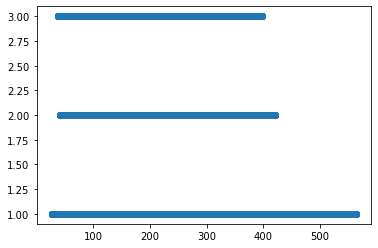

In [452]:
plt.scatter(df['SDRR'], df['condition'])
plt.show()


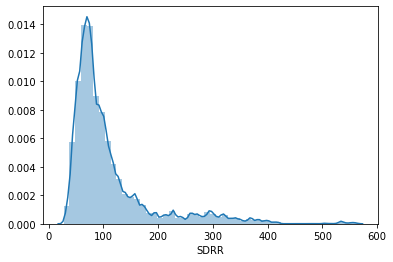

In [455]:
sns.distplot(df['SDRR'])

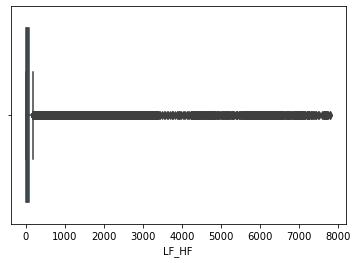

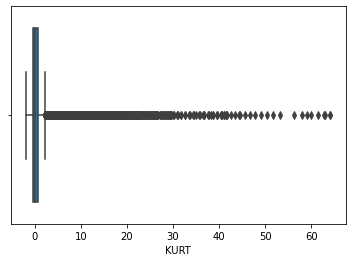

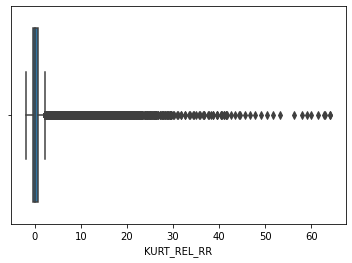

In [38]:

sns.boxplot(df['LF_HF']) 
plt.show()

sns.boxplot(df['KURT']) 
plt.show()

sns.boxplot(df['KURT_REL_RR']) 
plt.show()


In [46]:
# Checking different percentiles for field previous
df['LF_HF'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.95,0.99])

count    369289.000000
mean        115.977200
std         360.855129
min           2.319952
0.05%         2.656196
0.5%          3.399309
1%            4.051349
10%           9.028090
20%          12.965895
30%          16.614765
50%          28.789747
80%         105.050719
90%         233.208779
95%         419.450532
99%        1640.635377
max        7796.443096
Name: LF_HF, dtype: float64

In [52]:
# Checking one percentile and 99 percentile range for field age
print(df['LF_HF'].quantile(0.01))
print(df['LF_HF'].quantile(0.96))

4.051349019380831
508.30338859160804


In [53]:
df["LF_HF"] = np.where(df["LF_HF"] >508.0, 508.0,df['LF_HF'])
print(df['LF_HF'].skew())

2.4072721583415446


In [58]:
# Checking one percentile and 99 percentile range for field age
print(df['KURT'].quantile(0.01))
print(df['KURT'].quantile(0.96))

-1.2222417998803723
4.471957527105283


In [59]:
df["KURT"] = np.where(df["KURT"] >4.47, 4.47,df['KURT'])
print(df['KURT'].skew())

1.710234081808562


In [48]:
# Checking different percentiles for field previous
df['KURT_REL_RR'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.95,0.99])

count    369289.000000
mean          0.523235
std           1.790348
min          -1.894820
0.05%        -1.868459
0.5%         -1.376209
1%           -1.222242
10%          -0.673194
20%          -0.433137
30%          -0.278083
50%           0.040736
80%           1.026606
90%           2.134194
95%           3.513623
99%           7.287094
max          64.088107
Name: KURT_REL_RR, dtype: float64

In [60]:
# Checking one percentile and 99 percentile range for field age
print(df['KURT_REL_RR'].quantile(0.01))
print(df['KURT_REL_RR'].quantile(0.96))

-1.2222417998803723
4.471957527105283


In [61]:
df["KURT_REL_RR"] = np.where(df["KURT_REL_RR"] >4.47, 4.47,df['KURT_REL_RR'])
print(df['KURT_REL_RR'].skew())


1.710234081808562


In [65]:

def plot_corr(df, size=40):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

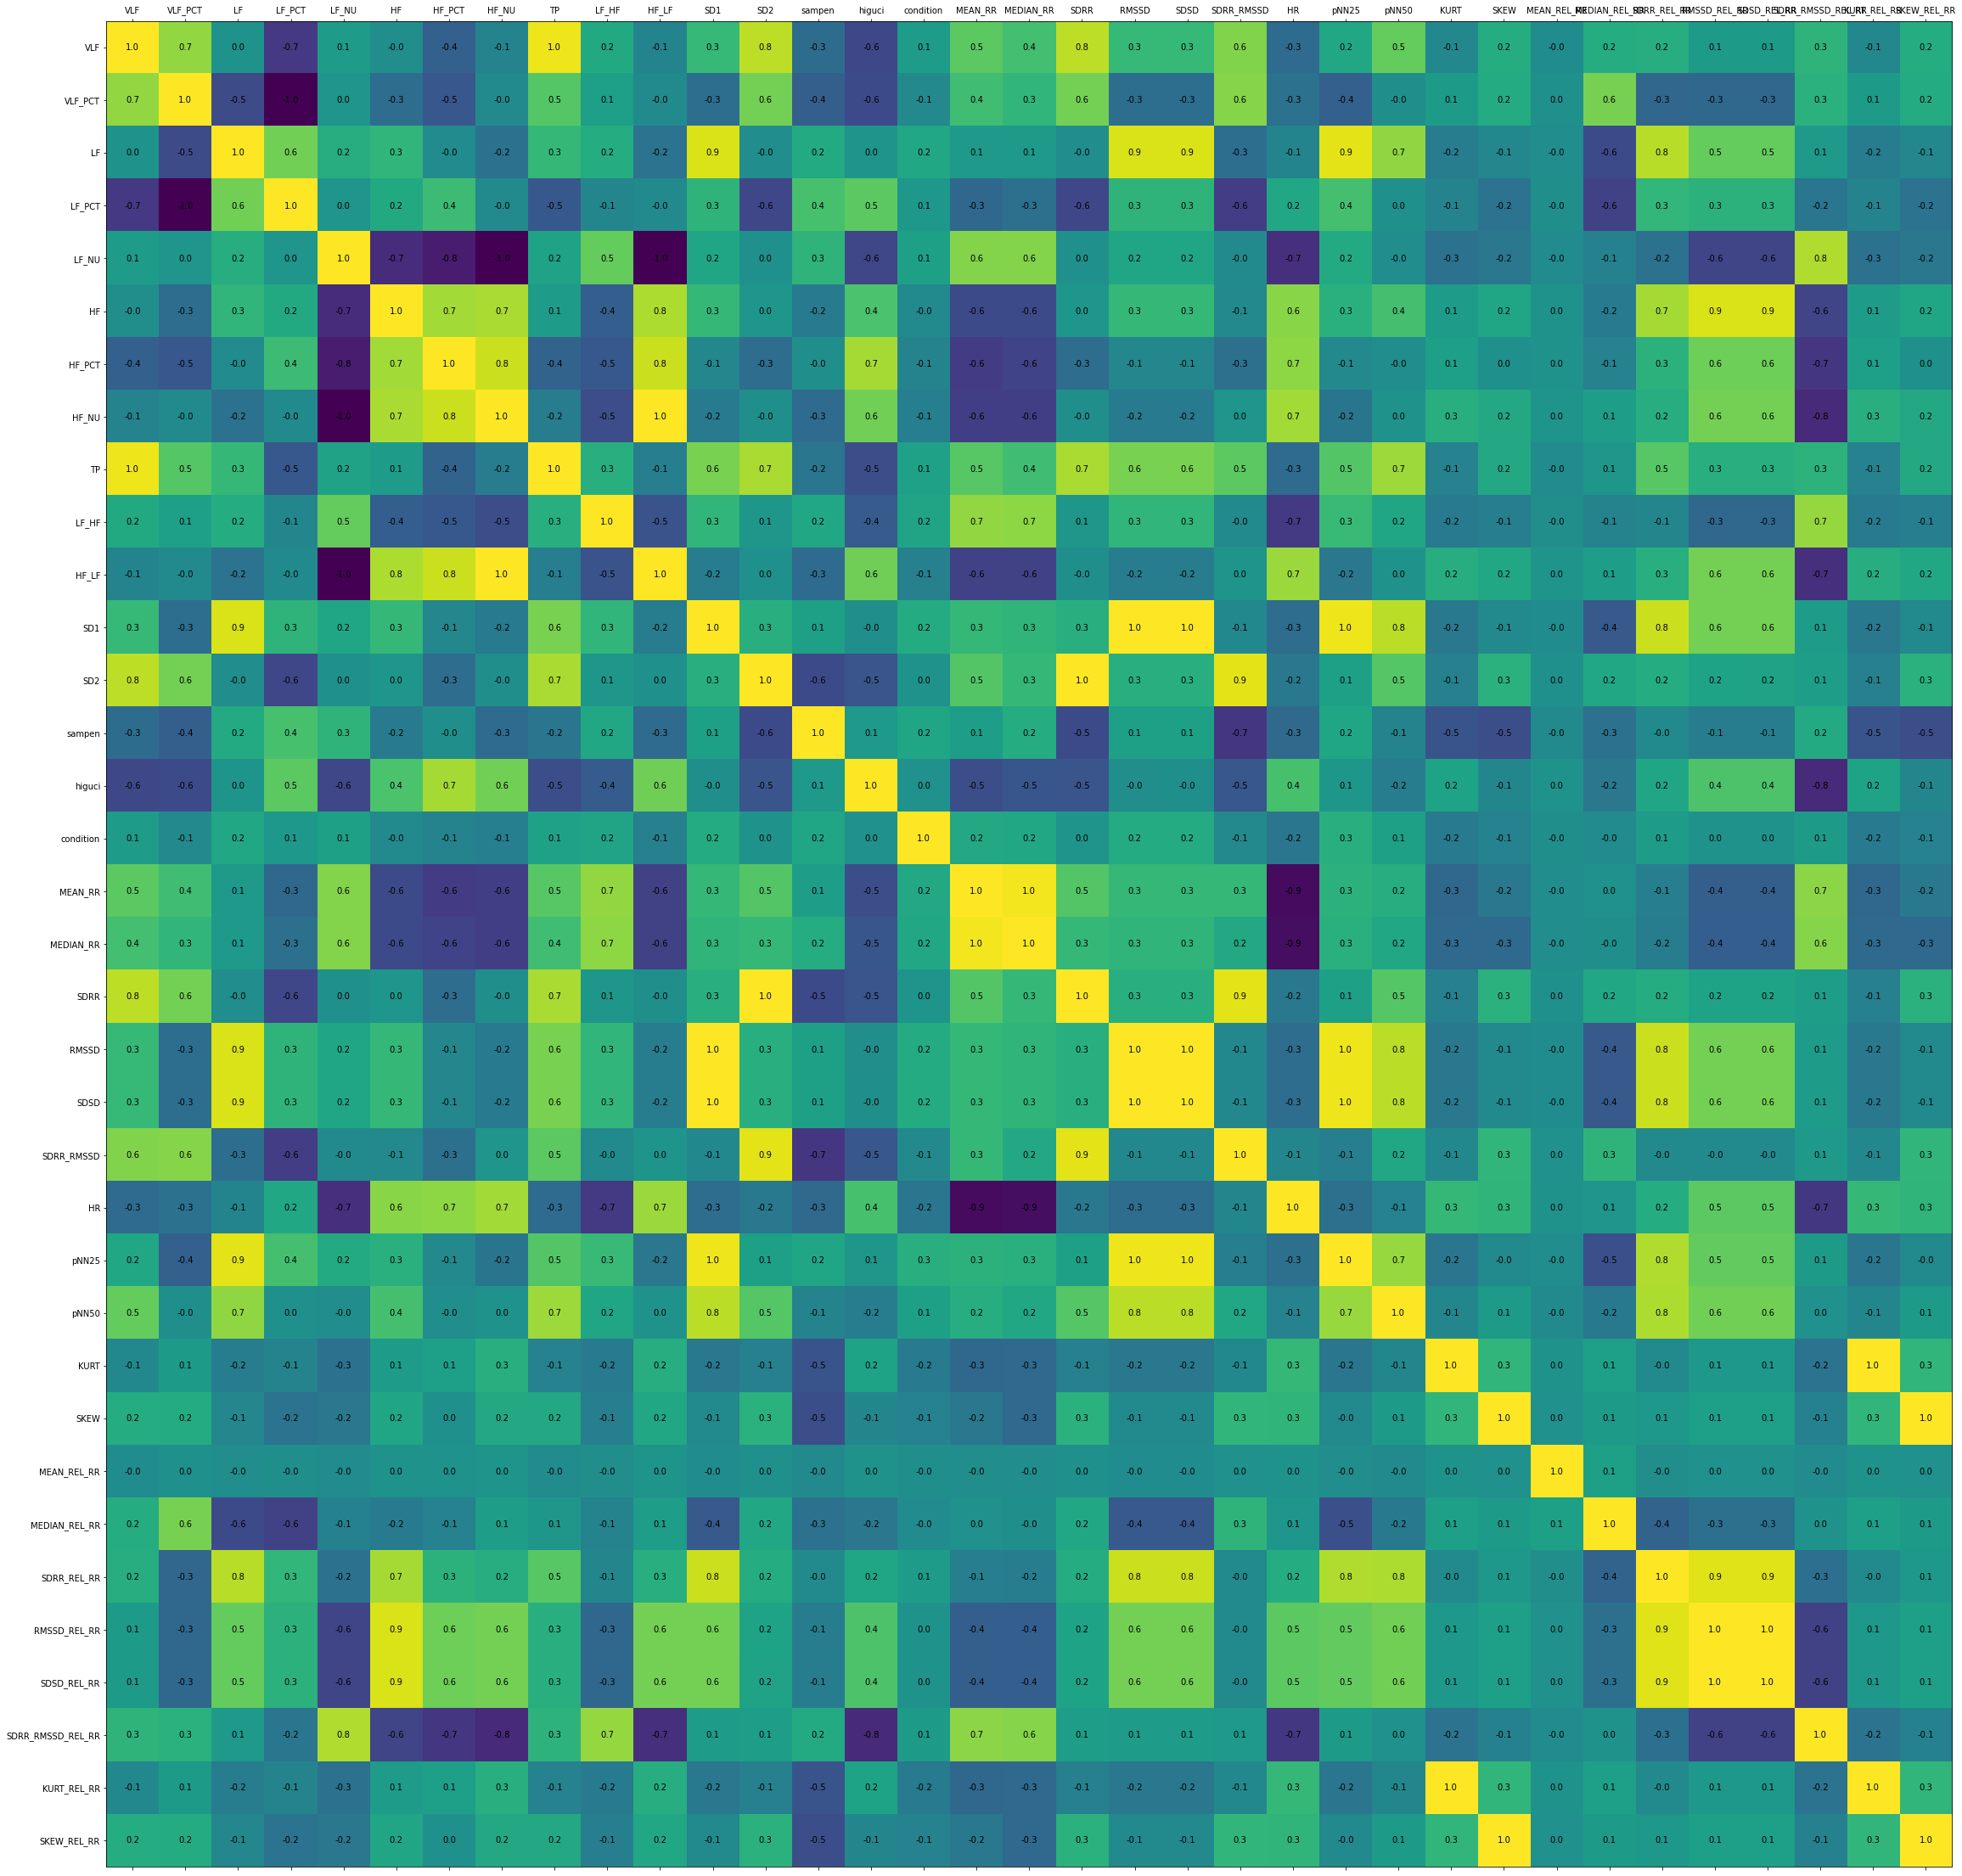

In [66]:
plot_corr(df)

In [426]:
corrMatrix = df.corr()
print (corrMatrix)

                        VLF   VLF_PCT        LF    LF_PCT     LF_NU        HF  \
VLF                1.000000  0.676628  0.026521 -0.664830  0.105044 -0.010441   
VLF_PCT            0.676628  1.000000 -0.541976 -0.995240  0.046868 -0.283068   
LF                 0.026521 -0.541976  1.000000  0.570404  0.247482  0.315662   
LF_PCT            -0.664830 -0.995240  0.570404  1.000000  0.043265  0.216789   
LF_NU              0.105044  0.046868  0.247482  0.043265  1.000000 -0.749237   
HF                -0.010441 -0.283068  0.315662  0.216789 -0.749237  1.000000   
HF_PCT            -0.389684 -0.460465 -0.032871  0.371761 -0.840496  0.721758   
HF_NU             -0.105044 -0.046868 -0.247482 -0.043265 -1.000000  0.749237   
TP                 0.951800  0.470337  0.331037 -0.452276  0.155373  0.107987   
LF_HF              0.126668  0.103768  0.099452 -0.082040  0.281325 -0.220058   
HF_LF             -0.094013 -0.041519 -0.235807 -0.048411 -0.996175  0.757545   
SD1                0.341293 

In [67]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)
# Drop features 
#df.drop(df[['LF_PCT', 'HF_NU', 'TP', 'HF_LF', 'MEDIAN_RR', 'pNN25', 'SDSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']], axis=1, inplace=True)

['LF_PCT', 'HF_NU', 'TP', 'HF_LF', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'pNN25', 'SDSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               369289 non-null  object 
 1   VLF                369289 non-null  float64
 2   VLF_PCT            369289 non-null  float64
 3   LF                 369289 non-null  float64
 4   LF_PCT             369289 non-null  float64
 5   LF_NU              369289 non-null  float64
 6   HF                 369289 non-null  float64
 7   HF_PCT             369289 non-null  float64
 8   HF_NU              369289 non-null  float64
 9   TP                 369289 non-null  float64
 10  LF_HF              369289 non-null  float64
 11  HF_LF              369289 non-null  float64
 12  SD1                369289 non-null  float64
 13  SD2                369289 non-null  float64
 14  sampen             369289 non-null  float64
 15  higuci             369289 non-null  float64
 16  co

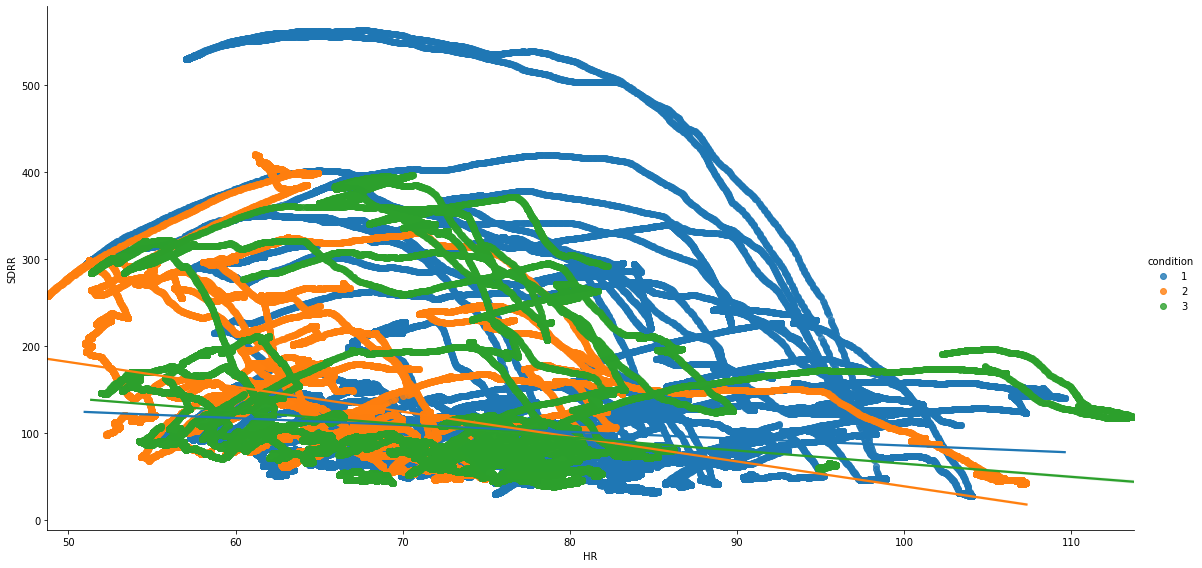

In [472]:

sns.lmplot(x='HR',y='SDRR',data= df,hue= 'condition',height=8, aspect=2)

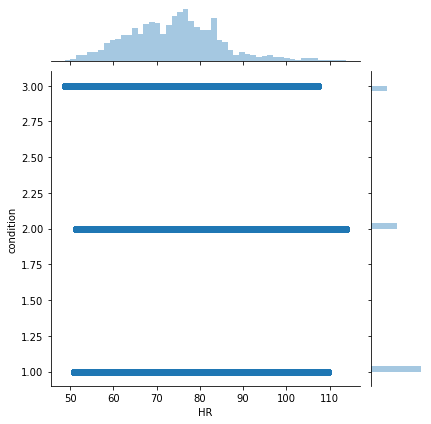

In [56]:
sns.jointplot(df['HR'],df['condition'])


In [70]:
df[['HR', 'uuid']]
df.reset_index()

,index,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
1,1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
2,2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
3,3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
4,4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,369284,028ae89f-0120-4808-955f-f6b3ecaa59b3,298.009244,45.893349,313.115284,48.219676,89.119683,38.227175,5.886975,10.880317,...,1.007321,0.075965,0.000015,0.000083,0.013352,0.008732,0.008732,1.529068,1.007321,0.075965
369285,369285,03f6d164-b28d-49e8-9e27-0288577408ec,1558.597883,68.405858,717.285030,31.481178,99.642453,2.573834,0.112964,0.357547,...,0.248964,0.167716,-0.000110,0.000046,0.014014,0.006317,0.006317,2.218313,0.248964,0.167716
369286,369286,fd717478-95c3-48fc-bcdc-3adebae824ab,1950.393956,45.030641,2376.578392,54.870376,99.819930,4.287216,0.098983,0.180070,...,-0.429686,-0.075321,-0.000216,-0.002236,0.022705,0.009494,0.009494,2.391601,-0.429686,-0.075321
369287,369287,a0fc861e-3254-4210-bd5d-37870245f7da,1606.291482,54.821185,1277.128490,43.587168,96.477005,46.636158,1.591647,3.522995,...,0.600389,-0.634762,0.000024,-0.001354,0.021549,0.011376,0.011376,1.894304,0.600389,-0.634762


In [82]:
Z = df.iloc[:,df.columns !='HR']
X = Z.iloc[:,Z.columns !='uuid']
Y = np.array(df['HR'])

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369289 entries, 0 to 369288
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  SD1                369289 non-null  float64
 12  SD2                369289 non-null  float64
 13  sampen             369289 non-null  float64
 14  higuci             369289 non-null  float64
 15  condition          369289 non-null  int64  
 16  ME

In [73]:
X.isnull().values.any()

False

In [84]:
X.isnull().sum().sum()

0

In [85]:
X[X.isnull().any(axis=1)]

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR


In [76]:
##Scale the data
from scipy.stats import zscore

df_z = X.apply(zscore)

In [77]:
df_z.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,0.254610,0.471781,0.109234,-0.418915,0.707808,-0.522547,-0.678297,-0.707808,0.260661,-0.125982,...,-1.011590,0.419702,-1.234344,0.329592,-0.273263,-0.444639,-0.444636,0.363248,-1.011590,0.419702
1,0.063161,0.756281,-0.446586,-0.694567,1.001290,-0.818019,-0.877559,-1.001290,-0.093005,2.036630,...,-0.656203,-0.281499,-0.350090,1.240130,-0.842030,-1.265779,-1.265786,2.458566,-0.656203,-0.281499
2,-0.454734,-0.783139,0.612522,0.887761,0.820630,-0.561157,-0.626270,-0.820630,-0.259708,0.115304,...,-0.053820,-0.998456,-0.056156,0.233261,-0.005791,-0.252957,-0.252953,0.319909,-0.053820,-0.998456
3,0.116081,0.351185,0.103543,-0.299551,0.644617,-0.463970,-0.616778,-0.644617,0.129556,-0.205875,...,-0.732896,-0.611513,0.696325,1.105011,-0.148392,-0.267329,-0.267325,0.117524,-0.732896,-0.611513
4,-0.577387,-1.214372,0.827718,1.256025,0.279697,0.197587,0.127137,-0.279697,-0.293352,-0.418945,...,-0.767344,-0.280021,-0.600321,-2.617391,0.943228,0.860676,0.860681,-0.506257,-0.767344,-0.280021


##### Creating Dummy Variables on Age_months column

In [93]:
xtrain,xtest,ytrain,ytest = train_test_split(df_z,Y,test_size = 0.3 , random_state=5)

In [87]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)
y_predict_lm = lm.predict(xtest)

In [88]:
print(lm.score(xtrain,ytrain))
print(lm.score(xtest,ytest))

0.9843360643067017
0.9842075352811926


In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Linear Regression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_predict_lm)),mean_squared_error(ytest, y_predict_lm),
            mean_absolute_error(ytest, y_predict_lm), r2_score(ytest, y_predict_lm)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Linear Regression 	 1.30 		 1.69 		0.87 		0.98


In [502]:
y_hats2 = lm.predict(X)

df['y_hats'] = y_hats2

In [364]:
df.to_csv(r'C:/Users/choud/Downloads/UTA/Hackathon/Train Data/LM_RESULT.csv', index = False)

In [503]:
from sklearn.ensemble import AdaBoostRegressor
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
abrg = AdaBoostRegressor( n_estimators= 20)
abrg= abrg.fit(xtrain,ytrain)

test_pred = abrg.predict(xtest)
abrg.score(xtest,ytest)

0.9736659536381257

In [505]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# Perform Grid-Search
gsc = GridSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_grid={
            'max_depth': [4,5,3],
            'max_features': ['sqrt','log2',0.5],
            'min_samples_leaf': [1,3],
            'min_samples_split': [2,3],
            'n_estimators': [25,50,100]
        },
        cv=5)

scoring = 'neg_mean_absolute_error'
grid_result = gsc.fit(xtrain,ytrain)
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, xtrain,ytrain, cv=5, scoring=scoring)
print(scores)

KeyboardInterrupt: 

In [506]:
print(scores)

[-0.95233889 -0.9702762  -0.96275129 -0.91609246 -0.96823281]


In [373]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

    
rfr = RandomForestRegressor(max_depth=4, n_estimators=50,random_state=False,
                            verbose=False)
rfr= rfr.fit(xtrain,ytrain)

test_pred = rfr.predict(xtest)
rfr.score(xtest,ytest)
# Perform K-Fold CV
#scores = cross_val_score(rfr, xtrain,ytrain, cv=1, scoring='mean_absolute_error')
#print(scores)

0.9641888309546442

In [375]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, test_pred)))

Mean Absolute Error: 1.410851077260383
Mean Squared Error: 3.8482996287678257
Root Mean Squared Error: 1.9617083444711718


In [312]:
print(grid_result,best_params)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=7,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [313]:
rfmodel = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False,
                            verbose=False)
rfmodel.fit(xtrain,ytrain)
rf_y_pred = rfmodel.predict(xtest)

In [314]:
rfmodel.score(xtrain,ytrain)
rfmodel.score(xtest,ytest)

0.5560386100268719

In [315]:
print("Training Score",rfmodel.score(xtrain,ytrain))
print("Testing Score",rfmodel.score(xtest,ytest))

Training Score 0.6733523039978292
Testing Score 0.5560386100268719


In [97]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor



rsv =   RandomizedSearchCV(
        estimator=RandomForestRegressor(random_state=7),
        param_distributions={"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 20),
              "min_samples_leaf": randint(1, 20)
              },n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)
    
rsv_result = rsv.fit(xtrain,ytrain)
best_params = rsv_result.best_params_

scoring =  'neg_mean_absolute_error'  
rfm = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"],min_samples_split=best_params["min_samples_split"],random_state=True,
                            verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfm, xtrain,ytrain, cv=5,scoring=scoring)
print(scores)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12, total=  46.7s
[CV] max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.6s remaining:    0.0s


[CV]  max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12, total=  46.6s
[CV] max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12 
[CV]  max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12, total=  46.0s
[CV] max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12 
[CV]  max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12, total=  46.3s
[CV] max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12 
[CV]  max_depth=3, max_features=4, min_samples_leaf=15, min_samples_split=12, total=  46.6s
[CV] max_depth=None, max_features=5, min_samples_leaf=7, min_samples_split=12 
[CV]  max_depth=None, max_features=5, min_samples_leaf=7, min_samples_split=12, total= 3.1min
[CV] max_depth=None, max_features=5, min_samples_leaf=7, min_samples_split=12 
[CV]  max_depth=None, max_features=5, min_samples_leaf=7, min_samples_split=12, total= 2.0min
[CV] max_depth=None, max_features=5, min_samples_leaf=7

[CV]  max_depth=3, max_features=2, min_samples_leaf=4, min_samples_split=15, total=  13.3s
[CV] max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3 
[CV]  max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3, total= 3.8min
[CV] max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3 
[CV]  max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3, total= 3.7min
[CV] max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3 
[CV]  max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3, total= 3.6min
[CV] max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3 
[CV]  max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3, total= 3.6min
[CV] max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3 
[CV]  max_depth=None, max_features=10, min_samples_leaf=9, min_samples_split=3, total= 3.6min
[CV] max_depth=None, max_features=7, min_sam

[CV]  max_depth=3, max_features=1, min_samples_leaf=7, min_samples_split=10, total=   7.8s
[CV] max_depth=3, max_features=1, min_samples_leaf=7, min_samples_split=10 
[CV]  max_depth=3, max_features=1, min_samples_leaf=7, min_samples_split=10, total=   7.9s
[CV] max_depth=3, max_features=1, min_samples_leaf=7, min_samples_split=10 
[CV]  max_depth=3, max_features=1, min_samples_leaf=7, min_samples_split=10, total=   7.8s
[CV] max_depth=None, max_features=1, min_samples_leaf=12, min_samples_split=9 
[CV]  max_depth=None, max_features=1, min_samples_leaf=12, min_samples_split=9, total=  31.5s
[CV] max_depth=None, max_features=1, min_samples_leaf=12, min_samples_split=9 
[CV]  max_depth=None, max_features=1, min_samples_leaf=12, min_samples_split=9, total=  31.4s
[CV] max_depth=None, max_features=1, min_samples_leaf=12, min_samples_split=9 
[CV]  max_depth=None, max_features=1, min_samples_leaf=12, min_samples_split=9, total=  31.3s
[CV] max_depth=None, max_features=1, min_samples_leaf=12

[CV]  max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=16, total=  52.3s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=16 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=16, total=  51.1s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=16 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=16, total=  51.0s
[CV] max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=16 
[CV]  max_depth=3, max_features=9, min_samples_leaf=15, min_samples_split=16, total=  50.9s
[CV] max_depth=None, max_features=10, min_samples_leaf=13, min_samples_split=8 
[CV]  max_depth=None, max_features=10, min_samples_leaf=13, min_samples_split=8, total= 3.6min
[CV] max_depth=None, max_features=10, min_samples_leaf=13, min_samples_split=8 
[CV]  max_depth=None, max_features=10, min_samples_leaf=13, min_samples_split=8, total= 3.6min
[CV] max_depth=None, max_features=10, min_samples_l

[CV]  max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2, total= 3.5min
[CV] max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2, total= 3.4min
[CV] max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2, total= 3.4min
[CV] max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2, total= 3.4min
[CV] max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2 
[CV]  max_depth=None, max_features=9, min_samples_leaf=5, min_samples_split=2, total= 3.4min
[CV] max_depth=3, max_features=10, min_samples_leaf=12, min_samples_split=16 
[CV]  max_depth=3, max_features=10, min_samples_leaf=12, min_samples_split=16, total=  56.6s
[CV] max_depth=3, max_features=10, min_samples_leaf=

[CV]  max_depth=None, max_features=1, min_samples_leaf=6, min_samples_split=6, total=  33.9s
[CV] max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12 
[CV]  max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12, total=  56.9s
[CV] max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12 
[CV]  max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12, total=  56.6s
[CV] max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12 
[CV]  max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12, total=  57.3s
[CV] max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12 
[CV]  max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12, total=  56.3s
[CV] max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12 
[CV]  max_depth=None, max_features=2, min_samples_leaf=6, min_samples_split=12, total=  56.9s
[CV] max_depth=3, max_features=1, min_samp

[CV]  max_depth=3, max_features=5, min_samples_leaf=9, min_samples_split=10, total=  29.5s
[CV] max_depth=3, max_features=5, min_samples_leaf=9, min_samples_split=10 
[CV]  max_depth=3, max_features=5, min_samples_leaf=9, min_samples_split=10, total=  29.5s
[CV] max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17 
[CV]  max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17, total=  18.9s
[CV] max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17 
[CV]  max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17, total=  18.8s
[CV] max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17 
[CV]  max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17, total=  18.7s
[CV] max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17 
[CV]  max_depth=3, max_features=3, min_samples_leaf=16, min_samples_split=17, total=  19.3s
[CV] max_depth=3, max_features=3, min_samples_leaf=16, min_samples

KeyboardInterrupt: 

In [378]:
print(rsv_result,best_params)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [94]:
rfmmodel = RandomForestRegressor(max_depth=best_params["max_depth"],min_samples_leaf=best_params["min_samples_leaf"], min_samples_split=best_params["min_samples_split"],random_state=False,
                            verbose=False)
rfmmodel.fit(xtrain,ytrain)
rf_y_pred = rfmmodel.predict(xtest)

In [95]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, rf_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, rf_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, rf_y_pred)))

Mean Absolute Error: 0.011457020783375281
Mean Squared Error: 0.0006439002785548632
Root Mean Squared Error: 0.02537519021711686


In [96]:
print("Training Score",rfmmodel.score(xtrain,ytrain))
print("Testing Score",rfmmodel.score(xtest,ytest))

Training Score 0.9999980525436508
Testing Score 0.9999939883494392


Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 0.04 		 0.00 		0.01 		1.00


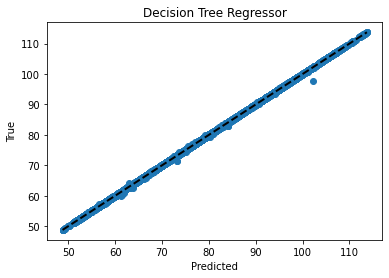

In [327]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(xtrain, ytrain)

y_pred_dtr = dtr.predict(xtest)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(ytest, y_pred_dtr)),mean_squared_error(ytest, y_pred_dtr),
            mean_absolute_error(ytest, y_pred_dtr), r2_score(ytest, y_pred_dtr)))

plt.scatter(ytest, y_pred_dtr)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [334]:
print(y_pred_dtr)

[83.26554569 66.9732821  60.36452681 ... 71.96482575 83.53699836
 72.25010339]


In [129]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 22,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=22)

In [140]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = df.drop('Target', axis=1)
feature_cols = xvar.columns

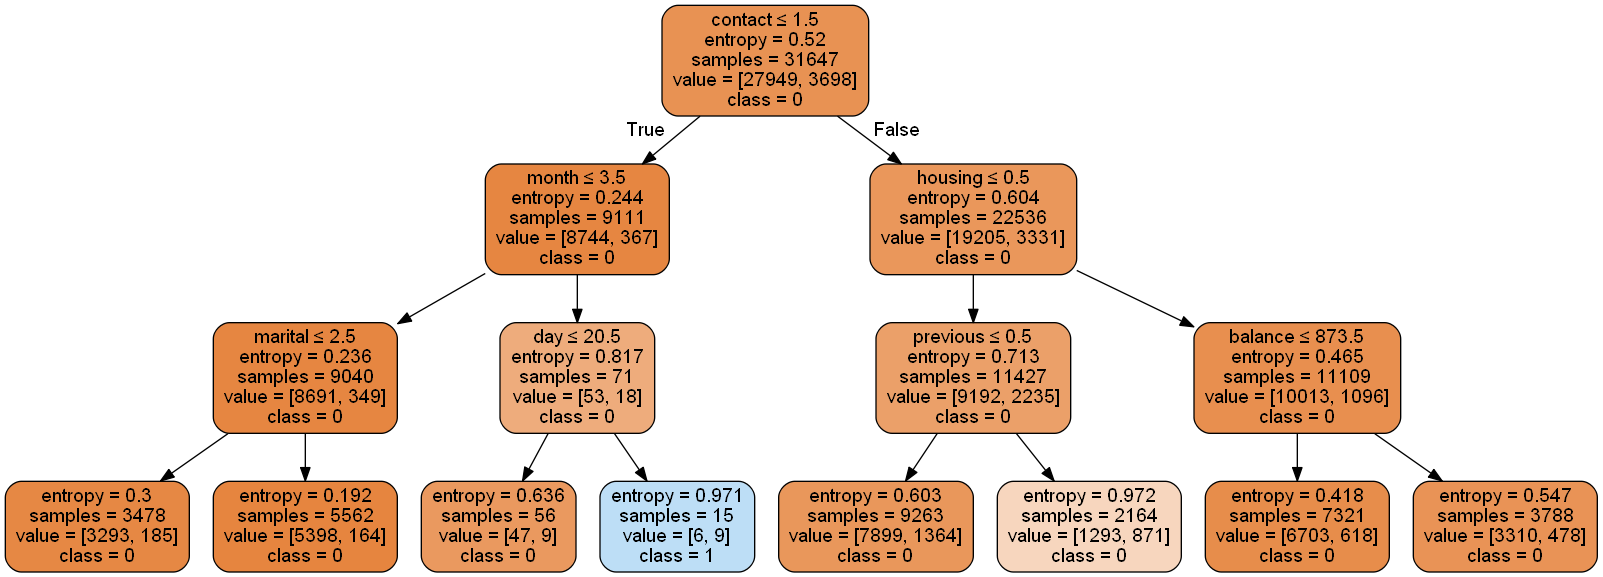

In [141]:
import os     
os.environ["PATH"] += os.pathsep + 'C:\\programdata\\Anaconda3\\Library\\bin\\graphviz'
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Target_pruned.png')
Image(graph.create_png())

In [142]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [143]:
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, classification_report
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8829253907401946
0.8832432774038613


In [144]:
acc_DT = accuracy_score(y_test, preds_pruned)
F1_DT = f1_score(y_test, preds_pruned)
precision_DT = precision_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned)
print(acc_DT)
print(F1_DT)
print(precision_DT)
print(recall_DT)

0.8829253907401946
0.006257822277847309
0.7142857142857143
0.0031426775612822125


In [145]:
preds_pruned_train[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [146]:
preds_pruned[:25]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [147]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
contact,0.42
previous,0.31
housing,0.21
balance,0.02
month,0.02
marital,0.02
day,0.01
age,0.00
job,0.00
education,0.00


In [148]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': acc_DT,'F1 Score': F1_DT,'Precision':precision_DT,'Recall':recall_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00


##### Creating a model through Balanced Random Forest

In [151]:
from imblearn.ensemble import BalancedRandomForestClassifier
from funcsigs import signature
import sklearn.cluster
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [152]:
brf.score(X_test, y_test)  # performance on test data

0.7336331465644352

In [153]:
brf.score(X_train, y_train)  # performance on test data

0.8294941068663696

In [154]:
acc_brf = accuracy_score(y_test, y_pred)
F1_brf = f1_score(y_test, y_pred)
precision_brf = precision_score(y_test, y_pred)
recall_brf = recall_score(y_test, y_pred)
print(acc_brf)
print(F1_brf)
print(precision_brf)
print(recall_brf)

0.7336331465644352
0.3704478132078759
0.25626808100289294
0.6681332495285983


In [167]:
tempResultsbrf = pd.DataFrame({'Method':['Balanced Random Forest'], 'Accuracy': acc_brf,'F1 Score': F1_brf,'Precision':precision_brf,'Recall':recall_brf})
resultsDf = pd.concat([resultsDf, tempResultsbrf])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17
0,Adaptive Boost,0.88,0.10,0.51,0.05
0,Gradient Boost,0.88,0.08,0.54,0.04
0,Balanced Random Forest,0.73,0.37,0.26,0.67


#### Creating of Model using Bagging Technique

In [155]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [156]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
F1_BG = f1_score(y_test, pred_BG)
precision_BG = precision_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG)
print(acc_BG)
print(F1_BG)
print(precision_BG)
print(recall_BG)

0.884399882040696
0.25757575757575757
0.5220729366602687
0.17096165933375235


In [157]:
tempResultsBG = pd.DataFrame({'Method':['Bagging'], 'Accuracy': acc_BG,'F1 Score': F1_BG,'Precision':precision_BG,'Recall':recall_BG})
resultsDf = pd.concat([resultsDf, tempResultsBG])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17


##### Creating Model by using Adaboost Ensemble Algorithm

In [158]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 10, learning_rate=1.0, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [159]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
F1_AB = f1_score(y_test, pred_AB)
precision_AB = precision_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB)
print(acc_AB)
print(F1_AB)
print(precision_AB)
print(recall_AB)

0.8829253907401946
0.09567198177676538
0.509090909090909
0.05279698302954117


In [160]:
tempResultsAB = pd.DataFrame({'Method':['Adaptive Boost'], 'Accuracy': acc_AB,'F1 Score': F1_AB,'Precision':precision_AB,'Recall':recall_AB})
resultsDf = pd.concat([resultsDf, tempResultsAB])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17
0,Adaptive Boost,0.88,0.10,0.51,0.05


In [161]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

##### Creating Model by using Gradient boost Ensemble Algorithm

In [164]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [165]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
F1_GB = f1_score(y_test, pred_GB)
precision_GB = precision_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB)

#### Creating a dataframe to compare different models and their metrics

In [166]:
tempResultsGB = pd.DataFrame({'Method':['Gradient Boost'], 'Accuracy': acc_GB,'F1 Score': F1_GB,'Precision':precision_GB,'Recall':recall_GB})
resultsDf = pd.concat([resultsDf, tempResultsGB])
resultsDf = resultsDf[['Method', 'Accuracy','F1 Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.89,0.03,0.53,0.01
0,Decision Tree,0.88,0.01,0.71,0.00
0,Bagging,0.88,0.26,0.52,0.17
0,Adaptive Boost,0.88,0.10,0.51,0.05
0,Gradient Boost,0.88,0.08,0.54,0.04
